###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> More about OpenCV:

- **OpenCV** is a huge open-source **library** for **computer vision**, **machine learning**, and **image processing**
-  It can process images and videos to identify objects, faces, or even the handwriting of a human
- When it integrated with various libraries, such as **Numpy** (Python) is capable of processing the OpenCV array structure for analysis
- To Identify image pattern and its various features we use vector space and perform mathematical operations on these features

###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Importing and visualizing Images

Try importing you own portrait image and play around with this workbook. The idea is to give you a perspective of how images looks like and what are some of the key components

In [1]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Using cv2 to read, write, and display images

In [2]:
# Read the image
image = cv2.imread('Portrait-Image.png') #--imread() helps in loading an image into jupyter including its pixel values

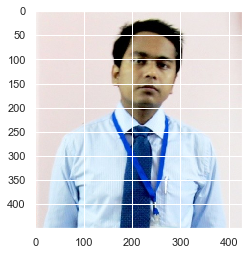

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Understanding Image Dimensions:

In [4]:
image.shape

(450, 428, 3)

***Note:***

The Shape of the image is 450 x 428 x 3 where 450 represents the height, 428 the width and 3 represents the number of color channels. When we say 450 x 428 it means we have 192,600 pixels in the data and every pixel has a R-G-B value hence 3 color channels


In [5]:
image[0][0]

array([231, 233, 243], dtype=uint8)

***Note:***

image [0][0] provides us with the pixel and 231, 233, 243 are the R-G-B values

###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Resizing Images:

In [6]:
image_small_size = cv2.resize(image, (110, 110))
image_bigger = cv2.resize(image, (640, 640))

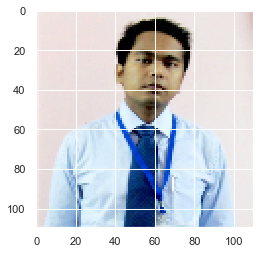

In [7]:
plt.imshow(cv2.cvtColor(image_small_size, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

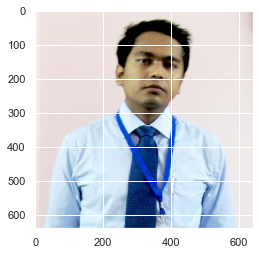

In [8]:
plt.imshow(cv2.cvtColor(image_bigger, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Gray Scalling:

Grayscaling is the process of converting an image from other color spaces e.g RGB, CMYK, HSV, etc. to shades of gray. It varies between complete black and complete white.

#### Importance:

- **Dimension reduction:** For e.g. In RGB images there are three color channels and has three dimensions while grayscaled images are single dimensional
- **Reduces model complexity:** Consider training neural article on RGB images of 10x10x3 pixel.The input layer will have 300 input nodes. On the other hand, the same neural network will need only 100 input node for grayscaled images
- **For other algorithms to work:** There are many algorithms that are customized to work only on grayscaled images e.g. Canny edge detection function pre-implemented in OpenCV library works on Grayscaled images only

Original Image:


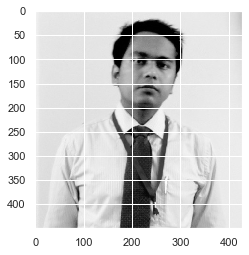

In [9]:
# Convert image to grayscale. The second argument in the following step is cv2.COLOR_BGR2GRAY, which converts colour image to grayscale.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Original Image:")

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Converting Data into Tabular Form: Flattening

In [10]:
import numpy as np
data = np.array(gray)
flattened = data.flatten()

In [11]:
gray.shape

(450, 428)

In [12]:
flattened.shape

(192600,)

When image is converted into gray scale, we are left with one channel only. Hence the shape of the object gray is 450 x 428. When working with ensemble techniques some of the models might require you input the data as tabular data and not volumes. Hence flatten is used to obtain every pixel values as columns, i.e. if there are 100 pixels we will have 100 columns.

In [13]:
flattened

array([236, 238, 238, ..., 232, 231, 231], dtype=uint8)

###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Detecting Faces in an image

<b>Haar cascade files:</b>


OpenCV comes with a lot of pre-trained classifiers. For instance, there are classifiers for smile, eyes, face, etc. These come in the form of xml files and are located in the opencv/data/haarcascades/ folder. However, to make things simple, you can also access them from here. Download the xml files and place them in the data folder in the same working directory as the jupyter notebook.

https://github.com/parulnith/Face-Detection-in-Python-using-OpenCV/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

Face detection
We shall be using the detectMultiscale module of the classifier. This function will return a rectangle with coordinates(x,y,w,h) around the detected face. This function has two important parameters which have to be tuned according to the data.

scalefactor In a group photo, there may be some faces which are near the camera than others. Naturally, such faces would appear more prominent than the ones behind. This factor compensates for that.

minNeighbors This parameter specifies the number of neighbors a rectangle should have to be called a face. You can read more about it in the link below.

https://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cv2.CascadeClassifier.detectMultiScale

In [14]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

faces_rects = haar_cascade_face.detectMultiScale(gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


In [15]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

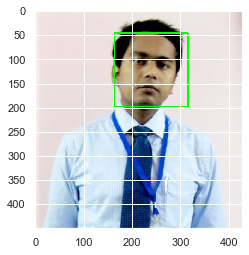

In [16]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Image Blurring:

Image Blurring refers to making the image less clear or distinct. It is done with the help of various low pass filter kernels.

Advantages of blurring:
1. It helps in Noise removal. As noise is considered as high pass signal so by the application of low pass filter kernel we restrict noise
2. It helps in smoothing the image
3. Low intensity edges are removed
4. It helps in hiding the details when necessary. For e.g. in many cases police deliberately want to hide the face of the victim, in such cases blurring is required.

#### Important types of blurring:
- <b>Gaussian Blurring:</b> Gaussian blur is the result of blurring an image by a Gaussian function.
- It is a widely used effect in graphics software, typically to **reduce image noise** and **reduce detail**. It is also used as a **preprocessing** stage before applying our machine learning or deep learning models.
- We should specify the *width* and *height* of the **kernel** which should be **positive and odd**. We also should specify the standard deviation in the  X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX.

https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html

The link above talks about other kinds of image blurring techniques like averaging, median, bilateral etc.

In [17]:
Gaussian1 = cv2.GaussianBlur(image, (5, 5), 0)
Gaussian2 = cv2.GaussianBlur(image, (15, 15), 0)

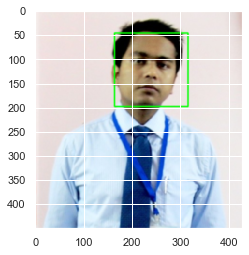

In [18]:
plt.imshow(cv2.cvtColor(Gaussian1, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

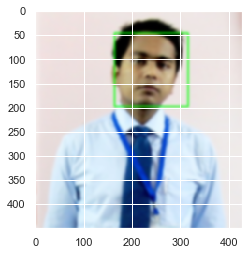

In [19]:
plt.imshow(cv2.cvtColor(Gaussian2, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

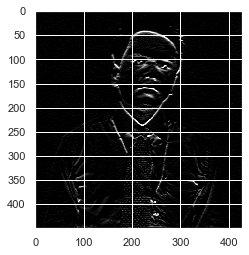

In [20]:
# 3x3 array for edge detection
mat_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
mat_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
  
filtered_image = cv2.filter2D(gray, -1, mat_y)
plt.imshow(filtered_image, cmap='gray')


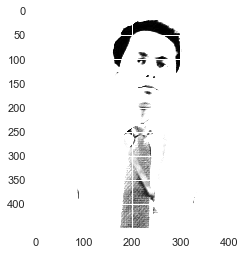

In [21]:
filtered_image = cv2.filter2D(gray, -1, mat_x)
plt.imshow(filtered_image, cmap='gray')

In [22]:
import numpy as np
filter_vals = np.array([[-1, -1, 1, 2], [-1, -1, 1, 0], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [23]:
# Define four different filters, all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])
# Print out the values of filter 1 as an example
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  2]
 [-1 -1  1  0]
 [-1 -1  1  1]
 [-1 -1  1  1]]


In [24]:
# conda install pytorch torchvision cudatoolkit=10.2 -c pytorch

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as fn

In [26]:
# Neural network with one convolutional layer and four filters
class Net(nn.Module):
    
    def __init__(self, weight): #Declaring a constructor to initialize the class variables
        super(Net, self).__init__()
        # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # Assumes there are 4 grayscale filters; We declare the CNN layer here. Size of the kernel equals size of the filter
        # Usually the Kernels are smaller in size
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        
    def forward(self, x):
        # Calculates the output of a convolutional layer pre- and post-activation
        conv_x = self.conv(x)
        activated_x = fn.relu(conv_x)

        # Returns both layers
        return conv_x, activated_x
    

# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# Print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [27]:
def visualization_layer(layer, n_filters= 4):
    
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

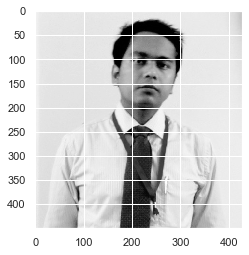

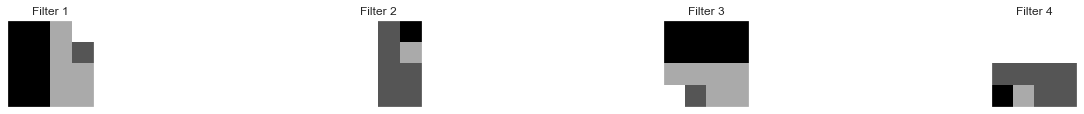

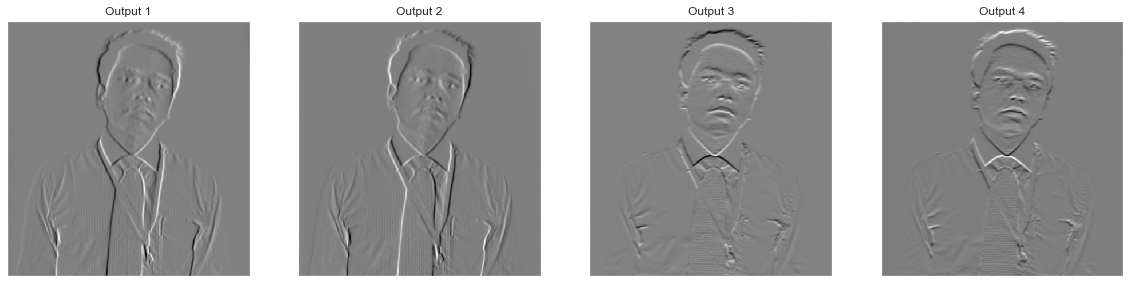

In [28]:
#-----------------Display the Original Image------------------- 
plt.imshow(gray, cmap='gray')

#-----------------Visualize all of the filters------------------
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)

for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    
# Convert the image into an input tensor
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)
# print(type(gray_img_tensor))

# print(gray_img_tensor)

# Get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model.forward(gray_img_tensor.float())

# Visualize the output of a convolutional layer
visualization_layer(conv_layer)

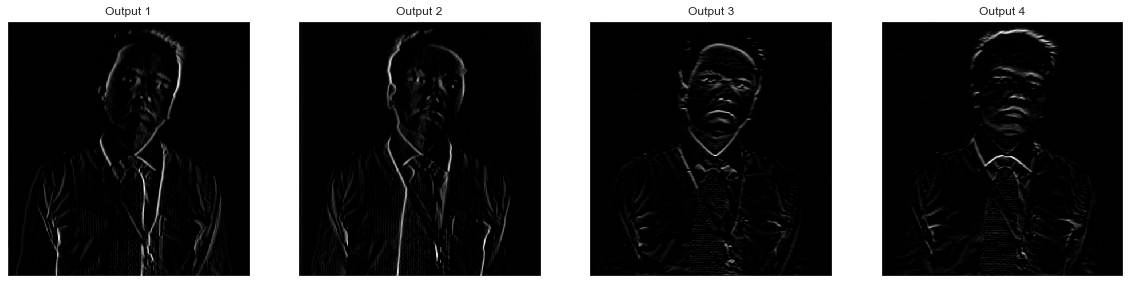

In [29]:
visualization_layer(activated_layer)

###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Working with the CIFAR-10 dataset

In [30]:
# Import necessary modules.

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [53]:
# Set the batch size, number of epochs.
batch_size = 10000
num_classes = 10
epochs = 10
num_predictions = 20

In [54]:
# Downloading the data and storing it in test/train datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [55]:
# Shape of the Data
print('Training Shape:', x_train.shape)
print('Training Samples:', x_train.shape[0])
print('Test samples',x_test.shape[0])

Training Shape: (50000, 32, 32, 3)
Training Samples: 50000
Test samples 10000


###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Exploring the Images

In [34]:
x_train[11,1,1] #RGB values of 11th image and the first pixel

array([196, 192, 190], dtype=uint8)

In [35]:
img=x_train[11,]

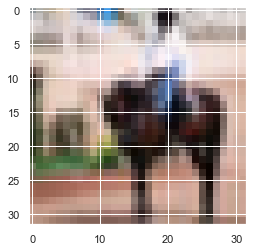

In [36]:
plt.imshow(img)

###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Adding Labels

In [37]:
label_dict =  {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [38]:
# Encode target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 
y_train_lb = label_encoder.fit_transform(y_train)
y_test_lb = label_encoder.fit_transform(y_test)

C:\Users\91905\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [43]:
print(y_train_lb.shape)
print(y_test_lb.shape)

(50000,)
(10000,)


In [44]:
x_train = x_train.astype('float32') # Conversion to float type from integer type.
x_test = x_test.astype('float32')
x_train /= 255.0 # Division by 255
x_test /= 255.0

In [45]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [46]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

In [47]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


###  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Building the CNN

In [48]:
from tensorflow.keras.layers import Flatten

In [56]:
model = models.Sequential()

model.add(layers.Conv2D(20, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.2))

# model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.2))

model.add(Flatten())

model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 20)        1520      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 20)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5120)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1310976   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [58]:
# Let's train the model using RMSprop
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
history = model.fit(x_train, y_train_lb, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test_lb),
                    shuffle=True, verbose=1)

Epoch 1/10
5/5 [==============================] - 37s 7s/step - loss: 4.6898 - accuracy: 0.1987 - val_loss: 35.4805 - val_accuracy: 0.1847
Epoch 2/10
5/5 [==============================] - 39s 8s/step - loss: 2.5160 - accuracy: 0.3125 - val_loss: 11.8085 - val_accuracy: 0.1657
Epoch 3/10
5/5 [==============================] - 38s 8s/step - loss: 1.9522 - accuracy: 0.3444 - val_loss: 9.8025 - val_accuracy: 0.1431
Epoch 4/10
5/5 [==============================] - 38s 8s/step - loss: 1.7965 - accuracy: 0.3713 - val_loss: 5.0938 - val_accuracy: 0.1925
Epoch 5/10
5/5 [==============================] - 38s 8s/step - loss: 1.6732 - accuracy: 0.4150 - val_loss: 4.8707 - val_accuracy: 0.2357
Epoch 6/10
5/5 [==============================] - 37s 7s/step - loss: 1.5704 - accuracy: 0.4525 - val_loss: 3.9619 - val_accuracy: 0.3148
Epoch 7/10
5/5 [==============================] - 39s 8s/step - loss: 1.4894 - accuracy: 0.4810 - val_loss: 3.5989 - val_accuracy: 0.3104
Epoch 8/10
5/5 [================